In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from IPython.display import display, Markdown
import streamlit as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pickle


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\user\OneDrive - Strathmore University\Projects\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\user\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\user\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Users\user\anaconda3\Lib

AttributeError: _ARRAY_API not found

In [2]:
# Load the dataset from the uploaded file
file_path = 'all_reports.xlsx'
data = pd.read_excel(file_path, sheet_name=None)  # Loading all sheets to inspect

# Display the sheet names and preview the first few rows of each sheet
data_sheets_preview = {sheet_name: data[sheet_name].head() for sheet_name in data.keys()}
data_sheets_preview


{'Reports':    Patient Name        Date  Systolic Pressure  Diastolic Pressure  \
 0  NGINA WAMBUI  2024-10-18                 12               130.0   
 1  ROSE WANJIRU  2024-10-17                 30                40.0   
 2  ROSE WANJIRU  2024-10-08                100                60.0   
 3    ABDI MALIK  2024-10-29                100                60.0   
 4    ABDI MALIK  2024-09-26                100               160.0   
 
    Pulse Rate  Temperature  SPO2  
 0          32         36.0    95  
 1          12         37.0    69  
 2          45         38.0    98  
 3          35         37.0    98  
 4          67         39.0    95  }

In [3]:
# Define thresholds for each health metric to determine patient condition
def determine_condition(row):
    # Setting conditions based on provided health thresholds
    if (
        90 <= row['Systolic Pressure'] <= 140 and
        60 <= row['Diastolic Pressure'] <= 90 and
        60 <= row['Pulse Rate'] <= 100 and
        36.5 <= row['Temperature'] <= 37.5 and
        95 <= row['SPO2'] <= 100
    ):
        return "Normal"
    else:
        return "Critical"

# Apply the function to create a new 'Condition' column in the dataset
data['Reports']['Condition'] = data['Reports'].apply(determine_condition, axis=1)

# Check the dataset with the new 'Condition' column added
data['Reports'].head()


,Patient Name,Date,Systolic Pressure,Diastolic Pressure,Pulse Rate,Temperature,SPO2,Condition
0,NGINA WAMBUI,2024-10-18,12,130.0,32,36.0,95,Critical
1,ROSE WANJIRU,2024-10-17,30,40.0,12,37.0,69,Critical
2,ROSE WANJIRU,2024-10-08,100,60.0,45,38.0,98,Critical
3,ABDI MALIK,2024-10-29,100,60.0,35,37.0,98,Critical
4,ABDI MALIK,2024-09-26,100,160.0,67,39.0,95,Critical


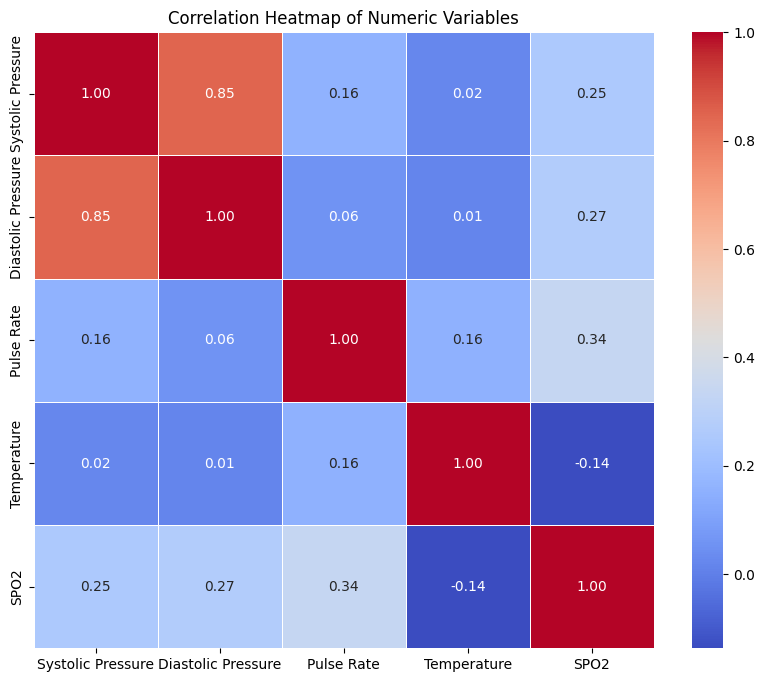

In [4]:
# Select only the numeric columns for correlation analysis
numeric_data = data['Reports'].select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix_numeric = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [5]:
# Encode the target variable 'Condition'
label_encoder = LabelEncoder()
data['Reports']['Condition'] = label_encoder.fit_transform(data['Reports']['Condition'])

In [6]:
# Selecting features and target
X = data['Reports'][['Systolic Pressure', 'Diastolic Pressure', 'Pulse Rate', 'Temperature', 'SPO2']]
y = data['Reports']['Condition']

In [7]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM Model Accuracy: 0.9375
Confusion Matrix for SVM:
 [[15  0]
 [ 1  0]]
Random Forest Model Accuracy: 1.0
Confusion Matrix for Random Forest:
 [[15  0]
 [ 0  1]]
XGBoost Model Accuracy: 0.9375
Confusion Matrix for XGBoost:
 [[15  0]
 [ 1  0]]
Decision Tree Model Accuracy: 0.9375
Confusion Matrix for Decision Tree:
 [[14  1]
 [ 0  1]]


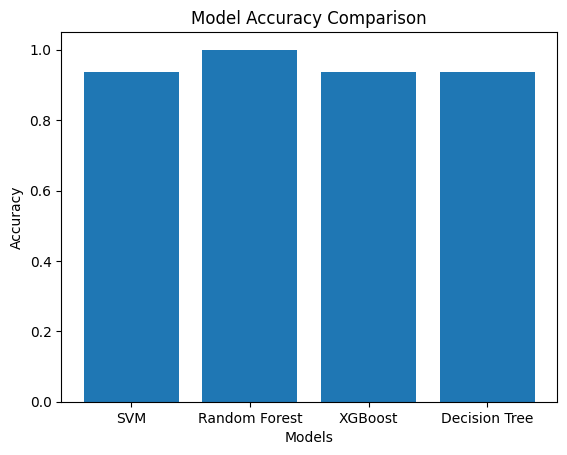

Best model 'Random Forest' saved as best_model.pkl


In [8]:
# Initialize models
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),  # XGBoost requires eval_metric
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Model Accuracy: {acc}")
    print(f"Confusion Matrix for {name}:\n", confusion_matrix(y_test, y_pred))

# Step 3: Plot the Model Accuracies
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Step 4: Select the Best Model and Save it as .pkl
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print(f"Best model '{best_model_name}' saved as best_model.pkl")


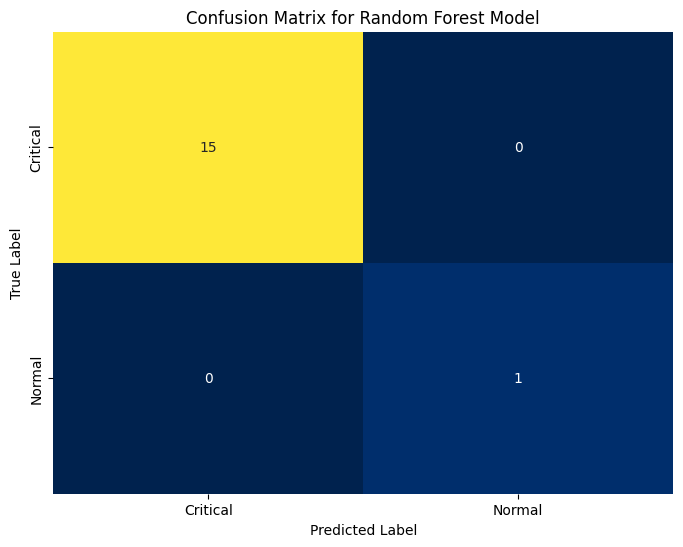

In [9]:
# Assuming 'best_model' now refers to the Random Forest model
best_model = models["Random Forest"]

# Predict on the test set
y_pred_rf = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix with a custom color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=["Critical", "Normal"], yticklabels=["Critical", "Normal"])  # Adjust labels as needed
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


In [10]:
# Assuming X includes all rows in data['Reports']
y_pred_rf_full = models["Random Forest"].predict(X)  # Predict on the entire dataset

# Add the predictions to the dataset
data['Random Forest_Prediction'] = y_pred_rf_full

# Save the model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(models["Random Forest"], model_file)

# Save the updated dataset with predictions
with open('modeled_dataset_with_predictions.pkl', 'wb') as data_file:
    pickle.dump(data, data_file)

print("Model saved as 'random_forest_model.pkl' and dataset with predictions saved as 'modeled_dataset_with_predictions.pkl'")


Model saved as 'random_forest_model.pkl' and dataset with predictions saved as 'modeled_dataset_with_predictions.pkl'


In [11]:
import streamlit as st
import pickle
import pandas as pd

# Load the SVM model
# Save the updated dataset with predictions
with open('modeled_dataset_with_predictions.pkl', 'wb') as data_file:
    pickle.dump(data, data_file)

# Streamlit app title and description
st.title("Predicting Condition App")
st.write("This app predicts the patient's condition based on health metrics.")

# User input form for health metrics
st.write("Please input the following health values for prediction:")

# Input fields based on health metrics
systolic_pressure = st.number_input("Systolic Pressure (mmHg)", min_value=50, max_value=200, value=110)
diastolic_pressure = st.number_input("Diastolic Pressure (mmHg)", min_value=30, max_value=120, value=75)
pulse_rate = st.number_input("Pulse Rate (bpm)", min_value=40, max_value=150, value=70)
temperature = st.number_input("Temperature (°C)", min_value=30.0, max_value=42.0, value=37.0)
spo2 = st.number_input("SPO2 (%)", min_value=80, max_value=100, value=98)

# Define thresholds to determine patient condition
def determine_condition(row):
    if (
        90 <= row['Systolic Pressure'] <= 120 and
        60 <= row['Diastolic Pressure'] <= 80 and
        60 <= row['Pulse Rate'] <= 100 and
        36.5 <= row['Temperature'] <= 37.5 and
        95 <= row['SPO2'] <= 100
    ):
        return "Normal"
    else:
        return "Critical"

# Prediction function
if st.button("Predict"):
    # Convert input data into a DataFrame for model prediction
    input_data = pd.DataFrame(
        [[systolic_pressure, diastolic_pressure, pulse_rate, temperature, spo2]],
        columns=["Systolic Pressure", "Diastolic Pressure", "Pulse Rate", "Temperature", "SPO2"]
    )
    
        # Use the Random Forest model to predict
    prediction = model.predict(input_data)[0]
    st.write("Predicted Condition (from Random Forest model):", prediction)

    # Determine patient condition based on the provided thresholds
    condition = determine_condition(input_data.iloc[0])
    st.write("Health Status Based on Thresholds:", condition)

    # Optional: Display the dataset sample (uncomment if you want to show it)
    # st.write(data['Reports'].head())


2024-12-11 08:55:55.194 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-11 08:55:55.813 
  command:

    streamlit run c:\Users\user\OneDrive - Strathmore University\Projects\ipykernel_launcher.py [ARGUMENTS]
2024-12-11 08:55:55.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-11 08:55:55.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-11 08:55:55.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-11 08:55:55.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-11 08:55:55.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-11 08:55:55.818 Thread 'Ma